In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Data Import

In [2]:
data = pd.read_csv('Fish_dataset.csv')
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


* Data has been inported successfully.
* We can see that the dataset has data on different species of fish.
* Dataset has 7 columns:
    1. Name of the species
    2. Wight of the species
    3. Length1 of the species
    4. Length2 of the species
    5. Length3 of the species
    6. Hight of the species
    7. Width of the species

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


* No missing values present

<AxesSubplot:xlabel='count', ylabel='Species'>

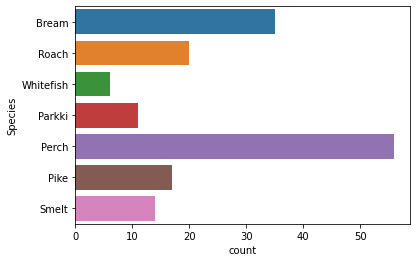

In [4]:
sns.countplot(data=data, y="Species")

<AxesSubplot:>

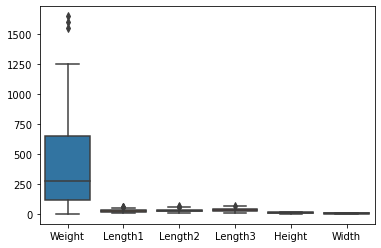

In [5]:
sns.boxplot(data=data)

#### Outliers are present in Weight, Length 1, Length 2, Length 3

##### Outlier Handling

In [6]:
for i in data.columns:
    if data[i].dtypes in ("float64", "int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        IQR = q3 - q1
        ul = q3 + 1.5 * IQR
        ll = q1 - 1.5 * IQR
        data[i].clip(upper = ul, lower = ll, inplace = True)

<AxesSubplot:>

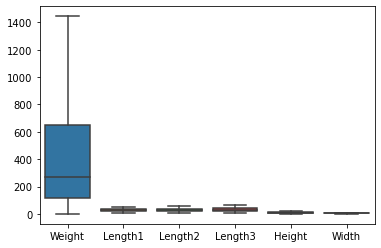

In [7]:
sns.boxplot(data=data)

#### Label Encoding

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Species']= label_encoder.fit_transform(data['Species'])

In [9]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [10]:
data.corr()

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.325065,-0.275736,-0.292480,-0.338373,-0.698193,-0.397578
Weight,-0.325065,1.000000,0.911859,0.915150,0.922441,0.741635,0.898874
Length1,-0.275736,0.911859,1.000000,0.999503,0.991943,0.636902,0.875426
Length2,-0.292480,0.915150,0.999503,1.000000,0.993990,0.651566,0.881426
Length3,-0.338373,0.922441,0.991943,0.993990,1.000000,0.706758,0.880175
Height,-0.698193,0.741635,0.636902,0.651566,0.706758,1.000000,0.792881
Width,-0.397578,0.898874,0.875426,0.881426,0.880175,0.792881,1.000000


<AxesSubplot:>

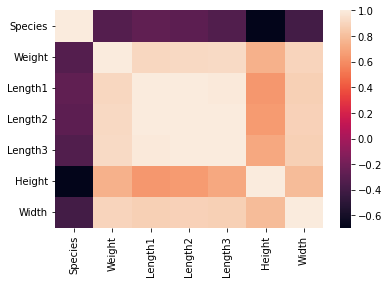

In [11]:
sns.heatmap(data.corr())

#### Train Test Split

In [12]:
X = data.drop('Weight', axis= 1)

y = data['Weight']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=134)

### VIF - Check Multi-Colinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

VIF

Species        2.614830
Length1    12524.460826
Length2    16375.841891
Length3     2492.439319
Height        65.271598
Width        103.526801
dtype: float64

* Multi- colinearity is Present in Dataset

### Best Feature Selection

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
sfs_model = sfs(lreg, n_features_to_select = 5, direction='forward', scoring='r2',cv=5)
sfs_model.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          scoring='r2')

In [16]:
sfs_model.feature_names_in_

array(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'],
      dtype=object)

In [17]:
sfs_model.get_feature_names_out()

array(['Species', 'Length2', 'Length3', 'Height', 'Width'], dtype=object)

In [18]:
X_train = X_train[['Species', 'Length2', 'Length3', 'Height', 'Width']]
train = pd.concat([y_train, X_train], axis= 1)
train

,Weight,Species,Length2,Length3,Height,Width
140,950.0,3,51.7,55.1,8.9262,6.1712
141,1250.0,3,56.0,59.7,10.6863,6.9849
116,900.0,2,39.0,41.4,11.1366,7.4934
8,450.0,0,30.0,35.1,14.0049,4.8438
0,242.0,0,25.4,30.0,11.5200,4.0200
...,...,...,...,...,...,...
15,600.0,0,32.0,37.2,15.4380,5.5800
114,700.0,2,37.0,39.4,10.8350,6.2646
119,850.0,2,40.0,42.3,11.9286,7.1064
120,900.0,2,40.0,42.5,11.7300,7.2250


In [19]:
X_test = X_test[['Species', 'Length2', 'Length3', 'Height', 'Width']]
test = pd.concat([y_test, X_test], axis= 1)
test.head()

,Weight,Species,Length2,Length3,Height,Width
100,197.0,2,25.6,27.0,6.5610,4.2390
103,260.0,2,27.5,28.9,7.1672,4.3350
113,700.0,2,36.0,38.3,10.6091,6.7408
122,820.0,2,40.0,42.5,11.1350,6.6300
94,150.0,2,23.0,24.5,5.2185,3.6260


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.intercept_

-570.2076104004489

In [22]:
model.coef_

array([19.42887074, 28.72112266, -9.0632977 , 24.36245903, 38.06445168])

In [23]:
model.feature_names_in_

array(['Species', 'Length2', 'Length3', 'Height', 'Width'], dtype=object)

In [24]:
model.score(X_train, y_train)

0.8881286017004375

### Equation

y       = c         + (m1       * X1)       + (m2       * X2)       + (m3       * X3)       + (m4       * X4)       + (m5       * X5)

Weight  = -570.2076 + (19.4288  * Species)  + (28.7211  * Length2)  + (-9.0632 * Length3)   + (24.3624  * Height)   + (38.0644  * Width)

### Prediction on Training Data

In [25]:
train['predicted_weight'] = model.predict(X_train)
train['residue'] = train['Weight'] - train['predicted_weight']
train

,Weight,Species,Length2,Length3,Height,Width,predicted_weight,residue
140,950.0,3,51.7,55.1,8.9262,6.1712,925.940866,24.059134
141,1250.0,3,56.0,59.7,10.6863,6.9849,1081.603932,168.396068
116,900.0,2,39.0,41.4,11.1366,7.4934,770.100513,129.899487
8,450.0,0,30.0,35.1,14.0049,4.8438,498.874714,-48.874714
0,242.0,0,25.4,30.0,11.5200,4.0200,321.084598,-79.084598
...,...,...,...,...,...,...,...,...
15,600.0,0,32.0,37.2,15.4380,5.5800,600.220923,-0.220923
114,700.0,2,37.0,39.4,10.8350,6.2646,676.663548,23.336452
119,850.0,2,40.0,42.3,11.9286,7.1064,795.228793,54.771207
120,900.0,2,40.0,42.5,11.7300,7.2250,793.092193,106.907807


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(train['Weight'], train['predicted_weight'])
r2

0.8881286017004375

### R-Squared Score: 0.88

### Conclusion
* R2 Score is > 0.7
* Model is best fit

### Prediction on Test Data

In [27]:
test['predicted_weight'] = model.predict(X_test)
test['residue'] = test['Weight'] - test['predicted_weight']
test.head()

,Weight,Species,Length2,Length3,Height,Width,predicted_weight,residue
100,197.0,2,25.6,27.0,6.5610,4.2390,280.399138,-83.399138
103,260.0,2,27.5,28.9,7.1672,4.3350,336.171715,-76.171715
113,700.0,2,36.0,38.3,10.6091,6.7408,670.534865,29.465135
122,820.0,2,40.0,42.5,11.1350,6.6300,755.948181,64.051819
94,150.0,2,23.0,24.5,5.2185,3.6260,172.342353,-22.342353


### Train RMSE

In [28]:
import math
from sklearn.metrics import mean_squared_error

model_mse   = mean_squared_error(train['Weight'], train['predicted_weight'])
model_rmse  = math.sqrt(model_mse)

model_rmse

110.81820506509874

### Test RMSE

In [29]:
model_mse   = mean_squared_error(test['Weight'], test['predicted_weight'])
model_rmse  = math.sqrt(model_mse)

model_rmse

126.4517085820707

c:\Users\Akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residue', ylabel='Density'>

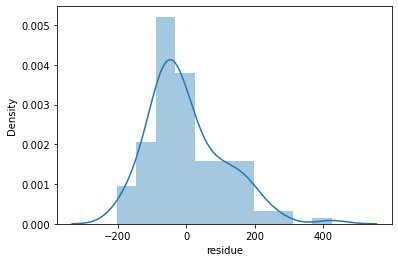

In [30]:
sns.distplot(train['residue'])

c:\Users\Akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residue', ylabel='Density'>

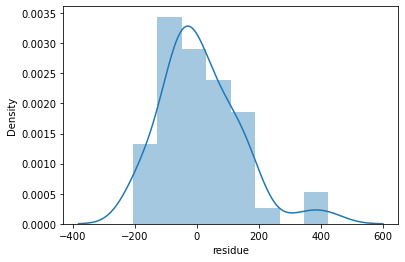

In [31]:
sns.distplot(test['residue'])